### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from matplotlib.colors import LinearSegmentedColormap, Normalize


### Read Data

In [2]:
df = pd.read_csv("C:\\Users\\hp\\Downloads\\AIMl_Coursework_TelecomCustomerChurn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Convert TotalCharges to Numeric and Replace Null Values with Median

In [6]:
# Convert 'TotalCharges' to numeric, coerce errors into NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for missing values
missing_values = df['TotalCharges'].isnull().sum()
print("Number of missing values in 'TotalCharges':", missing_values)

# Calculate the median of 'TotalCharges'
median_total_charges = df['TotalCharges'].median()

# Replace missing values with the median
df['TotalCharges'].fillna(median_total_charges, inplace=True)

# Confirming the missing values are handled
print("Number of missing values in 'TotalCharges' after handling:", df['TotalCharges'].isnull().sum())


Number of missing values in 'TotalCharges': 11
Number of missing values in 'TotalCharges' after handling: 0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Visualize the Data

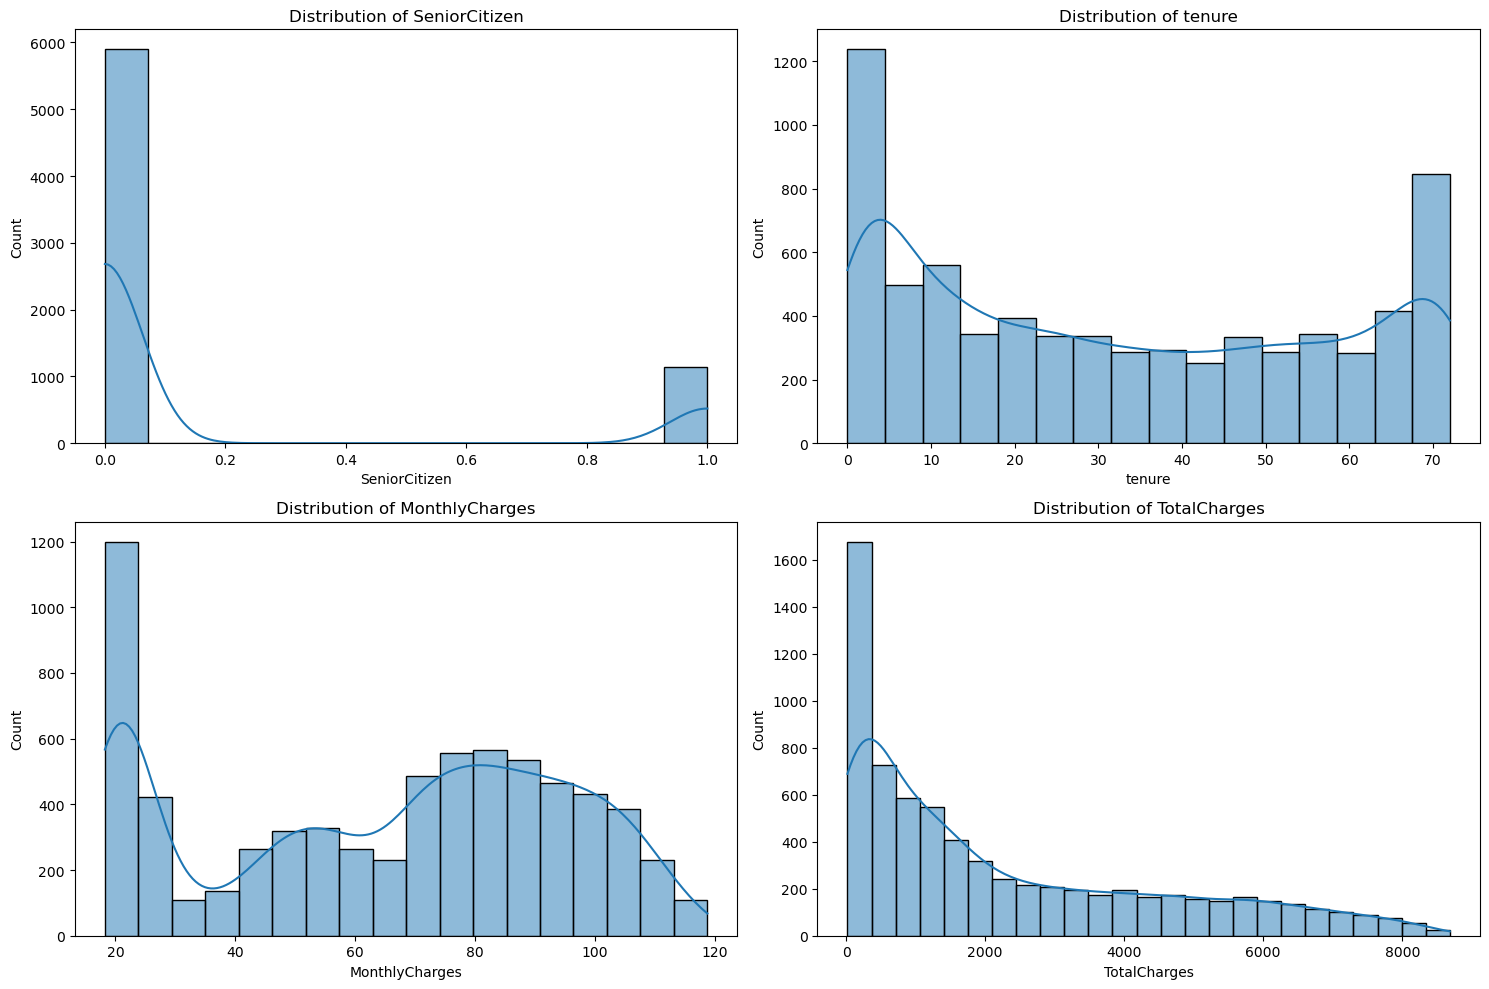

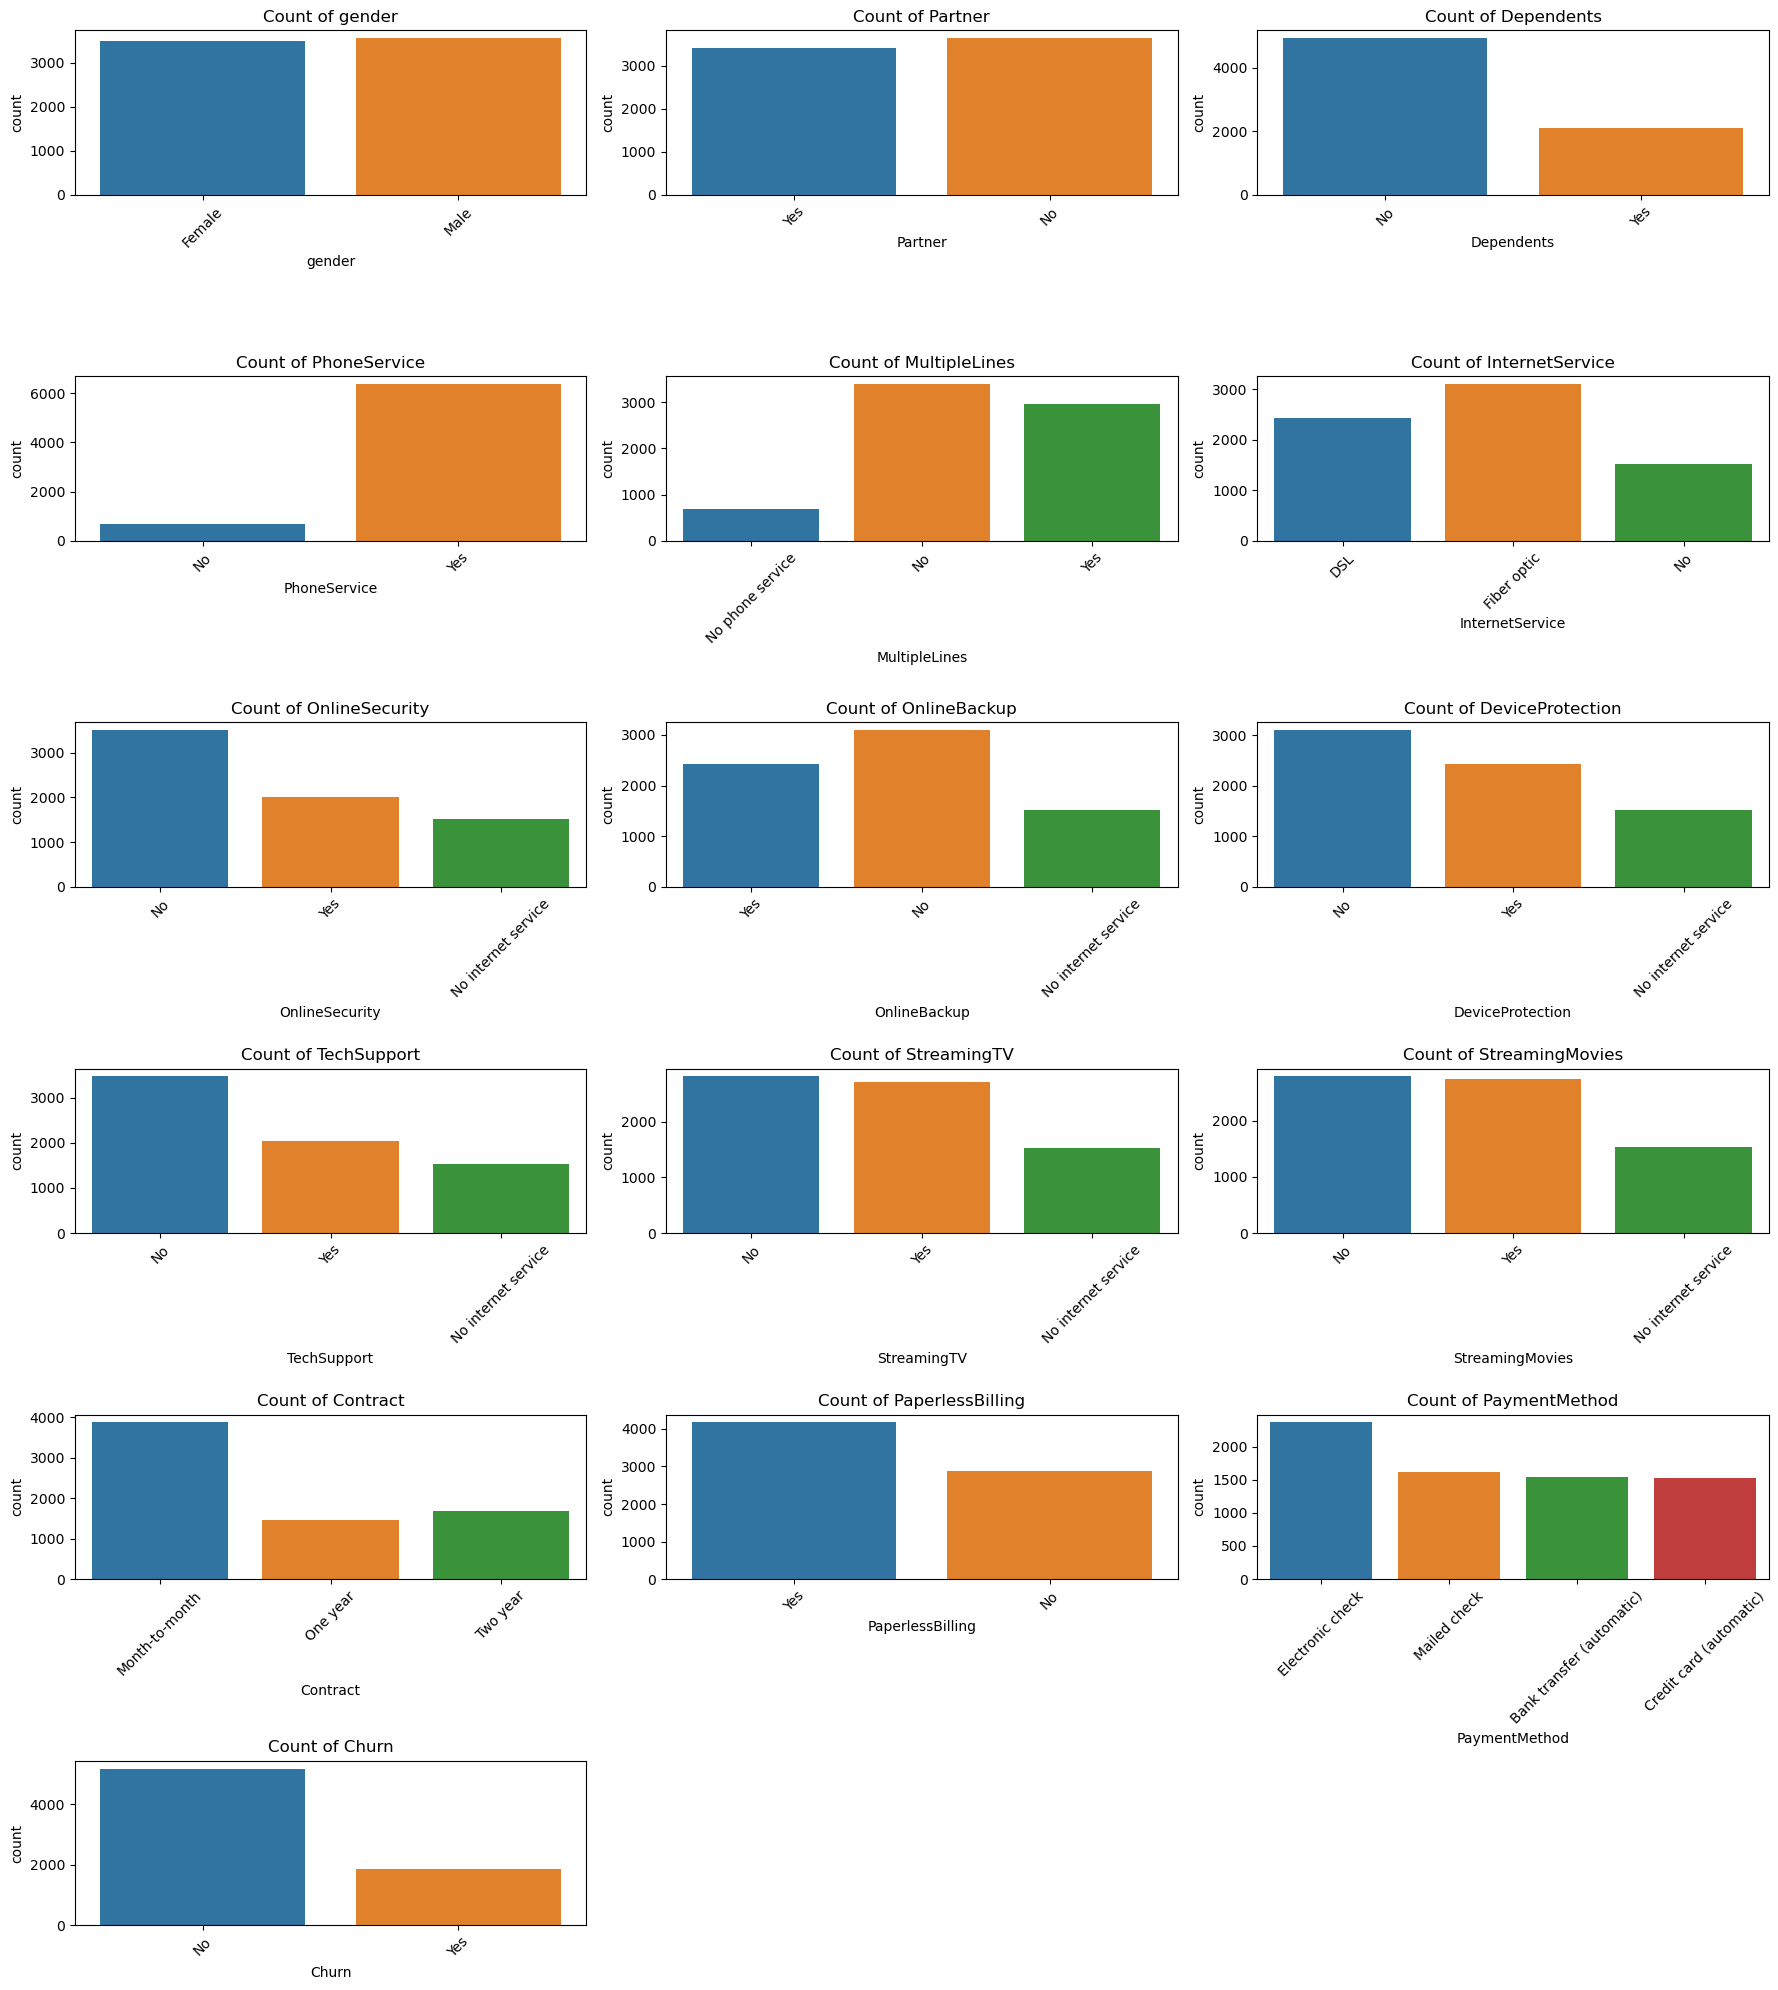

In [8]:
# Define numerical and categorical features
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                        'PaperlessBilling', 'PaymentMethod', 'Churn']

# Visualize numerical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Visualize categorical features
plt.figure(figsize=(18, 20))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(6, 3, i)
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Replace Categorical Values with Numercial Values

In [9]:
# Check if 'customerID' column is present before dropping it
if 'customerID' in df.columns:
    df.drop(columns=['customerID'], inplace=True)
else:
    print("'customerID' column not found in the DataFrame.")

# Convert 'Churn' column to binary labels
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)

# Convert binary categorical variables to binary values
binary_categorical_vars = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_categorical_vars] = df[binary_categorical_vars].replace({'Yes': 1, 'No': 0})

# Define mapping for multi-level categorical variables
categorical_mapping = {
    'MultipleLines': {'No': 2, 'Yes': 1, 'No phone service': 3},
    'InternetService': {'DSL': 1, 'Fiber optic': 2, 'No': 3},
    'OnlineSecurity': {'No': 2, 'Yes': 1, 'No internet service': 3},
    'OnlineBackup': {'No': 2, 'Yes': 1, 'No internet service': 3},
    'DeviceProtection': {'No': 2, 'Yes': 1, 'No internet service': 3},
    'TechSupport': {'No': 2, 'Yes': 1, 'No internet service': 3},
    'StreamingTV': {'No': 2, 'Yes': 1, 'No internet service': 3},
    'StreamingMovies': {'No': 2, 'Yes': 1, 'No internet service': 3},
    'Contract': {'Month-to-month': 3, 'One year': 1, 'Two year': 2},
    'PaymentMethod': {'Electronic check': 3, 'Mailed check': 4, 'Bank transfer (automatic)': 1, 'Credit card (automatic)': 2},
    'gender': {'Female': 0, 'Male': 1}  # Adding gender to the mapping
}

# Replace values using mapping dictionary
df.replace(categorical_mapping, inplace=True)

# Separate features and target variable
y = df['Churn']
X = df.drop(columns=['Churn'])

# Displaying the preprocessed DataFrame
print(X.head())
print(y.head())


   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              3                1               2             1   
1              2                1               1             2   
2              2                1               1             1   
3              3                1               1             2   
4              2                2               2             2   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            2            2                2         3   
1                 

### Run and Evaluate the Random Forest Classifier Model

Random Forest Results:
Accuracy: 0.7927608232789212
AUC Score: 0.8332755390396143
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.47      0.55       373

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409



<Figure size 800x600 with 0 Axes>

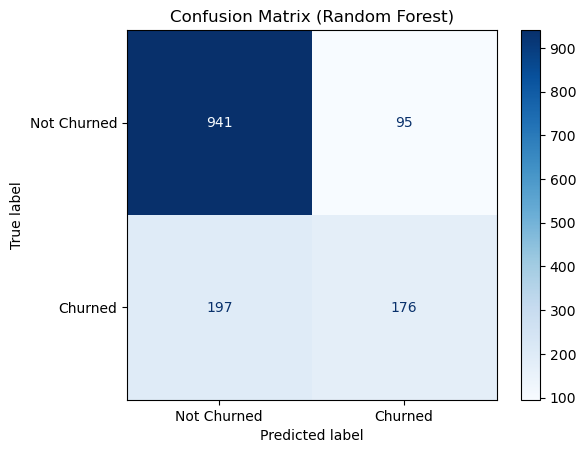

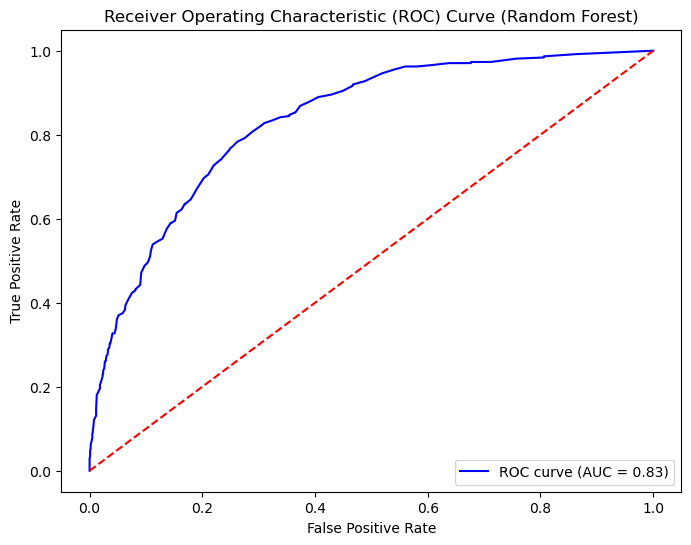

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model_rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
print("Random Forest Results:")
print("Accuracy:", accuracy_rf)

# Print AUC score
print("AUC Score:", auc_score_rf)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Not Churned', 'Churned'])
disp_rf.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Calculate ROC curve and AUC score
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_score_rf = roc_auc_score(y_test, y_prob_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score_rf)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()




### Visualize Feature Importance

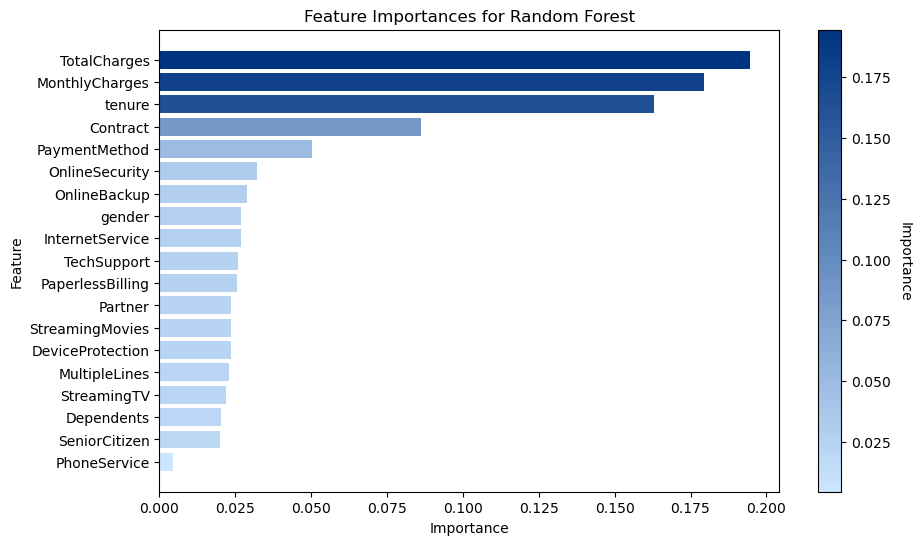

In [18]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize

# Get feature importances from the trained model
feature_importances = model_rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Define colormap (light blue to dark blue)
colors = [(0.8, 0.9, 1), (0, 0.2, 0.5)]  # Light blue to dark blue
cmap = LinearSegmentedColormap.from_list('custom_blue', colors)

# Normalize feature importances to range [0, 1]
norm = Normalize(vmin=feature_importance_df['Importance'].min(), vmax=feature_importance_df['Importance'].max())

# Plot the feature importances with customized colors
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=cmap(norm(feature_importance_df['Importance'])))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances for Random Forest')

# Add color bar legend
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm))
cbar.set_label('Importance', rotation=270, labelpad=15)

plt.show()


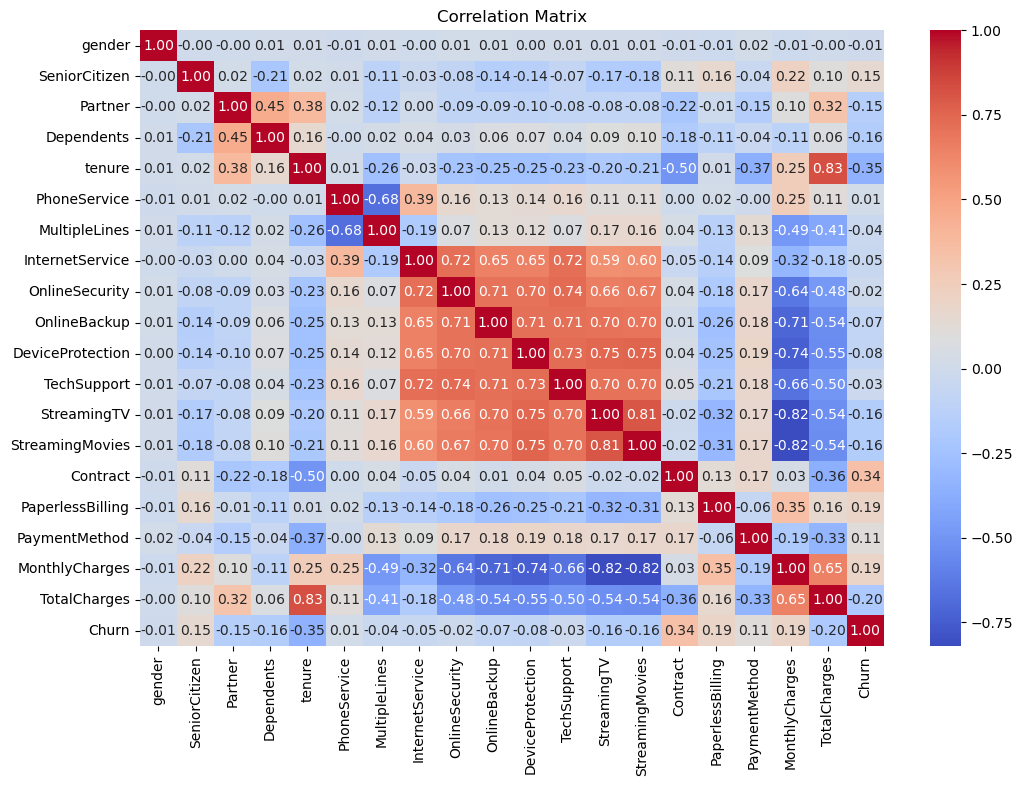

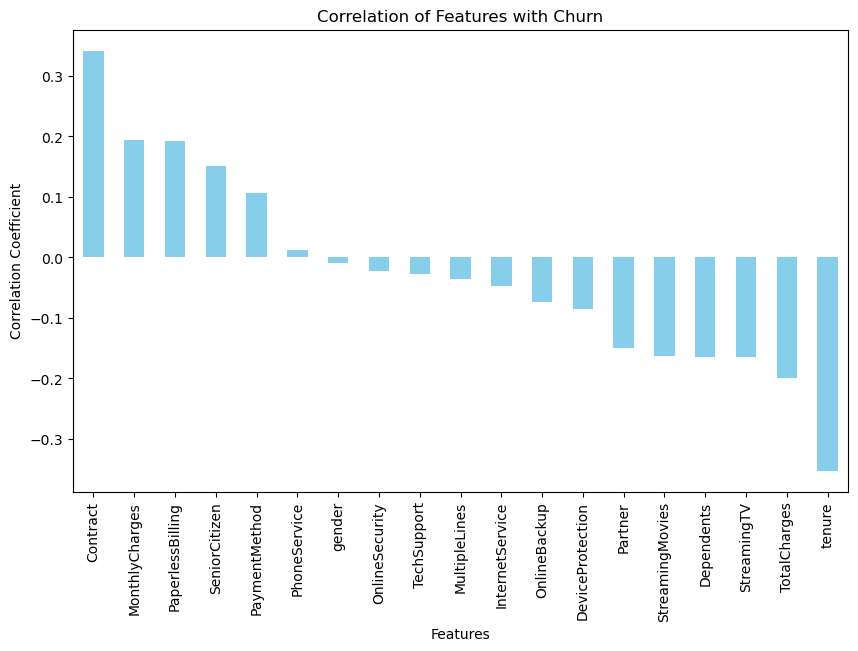

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = df.corr()

# Extract the correlation values with 'Churn'
correlation_with_churn = correlation_matrix['Churn'].sort_values(ascending=False)

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Plot the correlation with Churn
plt.figure(figsize=(10, 6))
correlation_with_churn.drop('Churn').plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Churn')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


## Run and Evaluate the Logistic Regression Model

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset (assuming it's already loaded into `df`)

# Separate features and target variable
y = df['Churn']
X = df.drop(columns=['Churn'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# Train the Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

<Figure size 800x600 with 0 Axes>

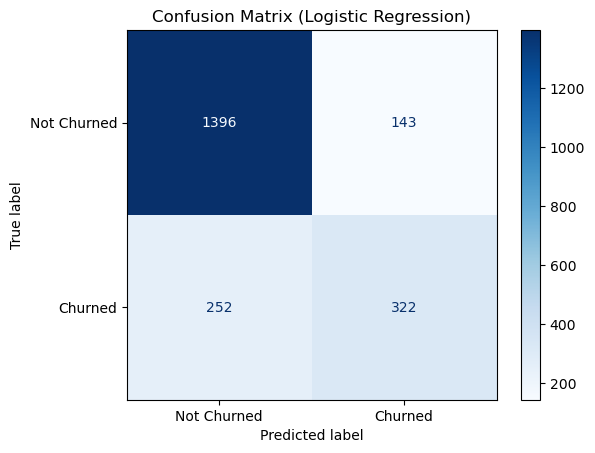

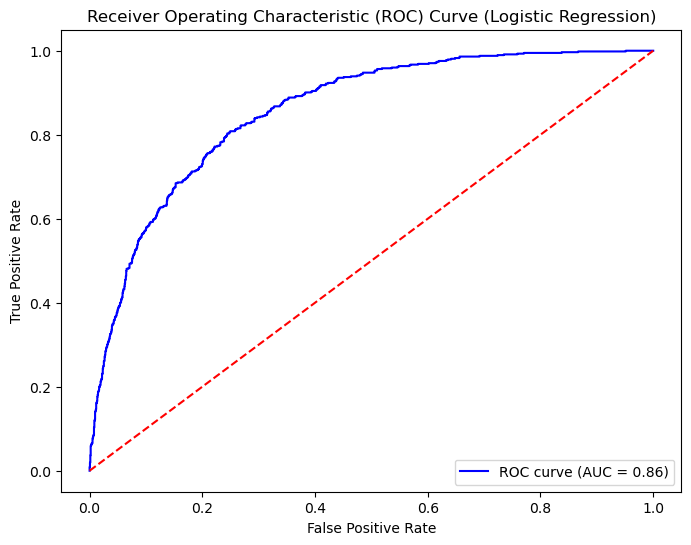

Logistic Regression Results:
Accuracy: 0.8130619971604354
AUC Score: 0.8563040392308685
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1539
           1       0.69      0.56      0.62       574

    accuracy                           0.81      2113
   macro avg       0.77      0.73      0.75      2113
weighted avg       0.81      0.81      0.81      2113



In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt

# Separate features and target variable
y = df['Churn']
X = df.drop(columns=['Churn'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)
y_prob_lr = model_lr.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['Not Churned', 'Churned'])
disp_lr.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Calculate ROC curve and AUC score
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_score_lr = roc_auc_score(y_test, y_prob_lr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score_lr)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve (Logistic Regression)')
plt.legend(loc='lower right')
plt.show()

# Print evaluation results for Logistic Regression
print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("AUC Score:", auc_score_lr)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))


             Feature  Importance
4             tenure   -1.331794
7    InternetService   -0.954266
5       PhoneService   -0.602270
3         Dependents   -0.084864
0             gender   -0.033710
2            Partner    0.010273
16     PaymentMethod    0.063278
6      MultipleLines    0.088091
1      SeniorCitizen    0.102901
15  PaperlessBilling    0.189533
14          Contract    0.291251
10  DeviceProtection    0.305217
13   StreamingMovies    0.344024
9       OnlineBackup    0.417122
18      TotalCharges    0.450266
12       StreamingTV    0.510705
11       TechSupport    0.566336
8     OnlineSecurity    0.606849
17    MonthlyCharges    2.487431


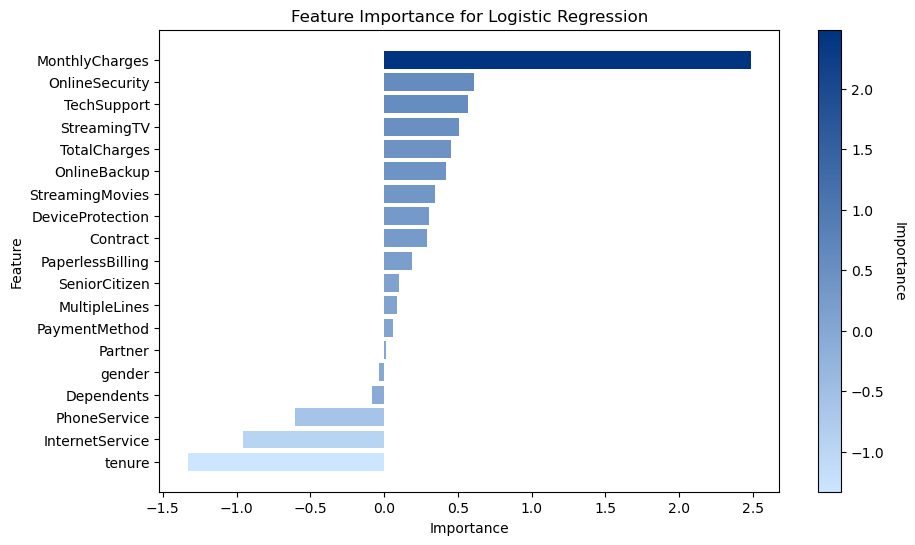

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize  # Add this import

# Assuming the dataset is loaded into df and features are preprocessed

# Separate features and target variable
y = df['Churn']
X = df.drop(columns=['Churn'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Logistic Regression model
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

# Get feature importances (coefficients)
feature_importances = model_lr.coef_[0]

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)
print(feature_importance_df)

# Define colormap (light blue to dark blue)
colors = [(0.8, 0.9, 1), (0, 0.2, 0.5)]  # Light blue to dark blue
cmap = LinearSegmentedColormap.from_list('custom_blue', colors)

# Normalize feature importances to range [0, 1]
norm = Normalize(vmin=feature_importance_df['Importance'].min(), vmax=feature_importance_df['Importance'].max())

# Plot the feature importances with customized colors
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color=cmap(norm(feature_importance_df['Importance'])))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Logistic Regression')

# Add color bar legend
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm))
cbar.set_label('Importance', rotation=270, labelpad=15)

plt.show()
